# Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
import sympy as sy

# Autovalores e Autovetores

Um autovetor ($v$) é um vetor não-nulo associado a uma matriz $A$ que guarda a seguinte relação: 

$$
A \cdot \mathbf{v} = \lambda \cdot \mathbf{v} \newline
$$

Podemos encontrar os autovetores ($v$) e autovalores ($\lambda$) a partir das manipulações abaixo:

$$
A \cdot \mathbf{v} - \lambda \cdot \mathbf{v} = 0 \newline
$$
$$
(A - \lambda \cdot I) \cdot \mathbf{v} = 0
$$

Encontramos os autovalores resolvendo o determinante abaixo: 

$$
\det(A - \lambda \cdot I) = 0
$$

## Polinômio Característico

O polinômio característico de uma matriz quadrada \( A \) é dado por:

$$
p \ (\lambda) = \det \ (A - \lambda \cdot I)
$$

Para uma matriz ( $2 \times 2$ ):

$$
A = 
\begin{bmatrix} 
a & b \\ 
c & d 
\end{bmatrix}
$$

O polinômio característico é:

$$
\begin{pmatrix}
\begin{bmatrix} 
a & b \\ 
c & d 
\end{bmatrix}
-
\begin{bmatrix} 
\lambda & 0 \\ 
0 & \lambda
\end{bmatrix}
\end{pmatrix}
.
\begin{bmatrix} 
x_1 \\ 
x_2 
\end{bmatrix}
=
\begin{bmatrix} 
0 \\ 
0 
\end{bmatrix}
$$

O que resulta em:

$$
\begin{bmatrix} 
a - \lambda & b \\ 
c & d - \lambda
\end{bmatrix}
.
\begin{bmatrix} 
x_1 \\ 
x_2 
\end{bmatrix}
=
\begin{bmatrix} 
0 \\ 
0 
\end{bmatrix}
$$

A solução é dada calculando o determinante da matriz para cada um dos $\lambda$:

$$
\det\begin{pmatrix} a - \lambda & b \\ c & d - \lambda \end{pmatrix} \newline
$$
$$
\lambda^2 - (a + d) \ . \lambda + (a\ .d - b\ .c)
$$

In [147]:
# Matriz
A = np.array([(2,1), (1,2)])

Matrix(A)

Matrix([
[2, 1],
[1, 2]])

In [148]:
# Polinomio com Scipy
lamda = sy.symbols('lambda')
polinomio = Matrix(A).charpoly(lamda)
polinomio

PurePoly(lambda**2 - 4*lambda + 3, lambda, domain='ZZ')

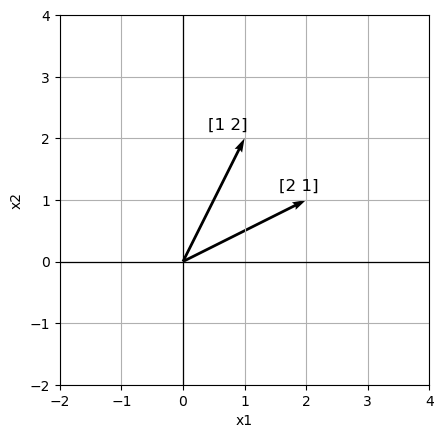

In [149]:
origem = [0, 0]

plt.quiver(*origem, *A[:,0], angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *A[:,1], angles='xy', scale_units='xy', scale=1, color='black', zorder=3)

plt.text(A[:,0][0]*1.1, A[:,0][1]*1.1, f"{A[:,0]}", ha='right', va='bottom', fontsize=12, color='black')
plt.text(A[:,1][0]*1.05, A[:,1][1]*1.05, f"{A[:,1]}", ha='right', va='bottom', fontsize=12, color='black')

plt.axhline(0, linestyle='-', linewidth=0.9, c='black')
plt.axvline(0, linestyle='-', linewidth=0.9, c='black')

x_max = 4
y_max = 4
x_min = -2
y_min = -2

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(range(x_min, x_max+1, 1))
plt.yticks(range(y_min, y_max+1, 1))
plt.xlabel('x1')
plt.ylabel('x2')

plt.gca().set_aspect('equal')
plt.grid()

## Solucionando com Numpy

O numpy possuí a função linalg.eig(A) para o cálculo de autovalores e autovetores. 

https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [150]:
autovalores, autovetores = np.linalg.eig(A)

# Eigenvalues
autovalores

array([3., 1.])

É importante notar que o primeiro autovalor está associado a primeira coluna de autovetores, possuí uma relação de 4:1 enquanto o segundo autovetor está associado a uma coluna de autovetores que possuí uma relação de 1:1. 

In [151]:
# Eigenvectors
autovetores

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [152]:
produto =  autovalores[0] * autovetores[:,0]
produto

array([2.12132034, 2.12132034])

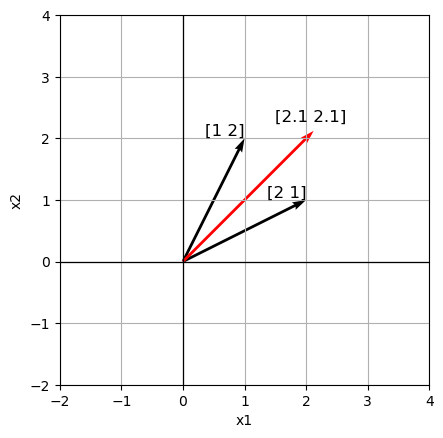

In [157]:
origem = [0, 0]

plt.quiver(*origem, *A[:,0], angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *A[:,1], angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *produto, angles='xy', scale_units='xy', scale=1, color='red')

# Vetores da Matriz
plt.text(A[:,0][0], A[:,0][1], f"{A[:,0]}", ha='right', va='bottom', fontsize=12, color='black')
plt.text(A[:,1][0], A[:,1][1], f"{A[:,1]}", ha='right', va='bottom', fontsize=12, color='black')

# Vetores (Autovalores . Autovetores)
plt.text(produto[0]*1.25, produto[1]*1.05, f"{np.round(produto, 1)}", ha='right', va='bottom', fontsize=12, color='black')

plt.axhline(0, linestyle='-', linewidth=0.9, c='black')
plt.axvline(0, linestyle='-', linewidth=0.9, c='black')

x_max = 4
y_max = 4
x_min = -2
y_min = -2

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(range(x_min, x_max+1, 1))
plt.yticks(range(y_min, y_max+1, 1))
plt.xlabel('x1')
plt.ylabel('x2')

plt.gca().set_aspect('equal')
plt.grid()
plt.show()

Os autovalores $\lambda $ e autovetores $\mathbf{v}$ que encontramos indicam tanto a direção quanto a magnitude da transformação linear associado a matriz A.

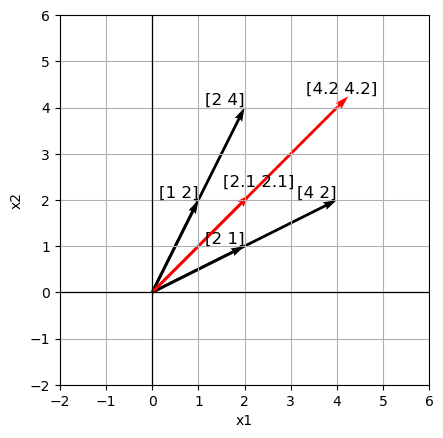

In [162]:
origem = [0, 0]

k = 2

plt.quiver(*origem, *A[:,0], angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *A[:,0]*k, angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *A[:,1], angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *A[:,1]*k, angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *produto, angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(*origem, *produto*k, angles='xy', scale_units='xy', scale=1, color='red')

# Vetores da Matriz
plt.text(A[:,0][0], A[:,0][1], f"{A[:,0]}", ha='right', va='bottom', fontsize=12, color='black')
plt.text(A[:,1][0], A[:,1][1], f"{A[:,1]}", ha='right', va='bottom', fontsize=12, color='black')
plt.text(A[:,0][0]*k, A[:,0][1]*k, f"{A[:,0]*k}", 
         ha='right', va='bottom', fontsize=12, color='black')
plt.text(A[:,1][0]*k, A[:,1][1]*k, f"{A[:,1]*k}", 
         ha='right', va='bottom', fontsize=12, color='black')

# Vetores (Autovalores . Autovetores)
plt.text(produto[0]*1.45, produto[1]*1.05, f"{np.round(produto, 1)}", 
         ha='right', va='bottom', fontsize=12, color='black')
plt.text(produto[0]*k*1.15, produto[1]*k, f"{np.round(produto*2, 1)}", 
         ha='right', va='bottom', fontsize=12, color='black')

plt.axhline(0, linestyle='-', linewidth=0.9, c='black')
plt.axvline(0, linestyle='-', linewidth=0.9, c='black')

x_max = 3*k
y_max = 3*k
x_min = -2
y_min = -2

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(range(x_min, x_max+1, 1))
plt.yticks(range(y_min, y_max+1, 1))
plt.xlabel('x1')
plt.ylabel('x2')

plt.gca().set_aspect('equal')
plt.grid()
plt.show()

## Prova Real

Abaixo fazemos a prova real da igualdade abaixo: 

$$
A \cdot \mathbf{v} = \lambda \cdot \mathbf{v} \newline
$$

In [163]:
np.dot(A, autovetores)

array([[ 2.12132034, -0.70710678],
       [ 2.12132034,  0.70710678]])

In [167]:
# Lembrando que autovalores são escalares *
autovalores * autovetores

array([[ 2.12132034, -0.70710678],
       [ 2.12132034,  0.70710678]])

In [168]:
np.dot(A, autovetores) == autovalores * autovetores

array([[ True,  True],
       [ True,  True]])